# Get Metrics

In [50]:
import numpy as np, pandas as pd, joblib
from sklearn.datasets import fetch_openml

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
mnist = fetch_openml('mnist_784', version=1, parser="auto") #This returns a bunch object (something like dictionary) that is compatible with sklearn

In [5]:
# Extract the full training set and test set
X_train_full = mnist.data[:60000]
y_train_full = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [6]:
y_test = y_test.astype(np.uint8)

In [11]:
X_train_full.iloc[5]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 5, Length: 784, dtype: int64

In [12]:
y_train_full[5]

'2'

## KNN-Enhanced Metrics

In [25]:
knn_enhanced = joblib.load("knn_model_ehanced.pkl")

In [8]:
knn_enhanced_pred = knn_enhanced.predict()

TypeError: KNeighborsClassifier.predict() missing 1 required positional argument: 'X'

In [9]:
knn_enhanced_pred

NameError: name 'knn_enhanced_pred' is not defined

In [9]:
knn_enhanced_acc = accuracy_score( y_test, knn_enhanced_pred)

In [10]:
knn_enhanced_acc

0.9714

In [11]:
knn_enhanced_prec = precision_score(y_test, knn_enhanced_pred, average='macro')

In [12]:
knn_enhanced_prec

0.9715597201945959

In [13]:
knn_enhanced_rec = recall_score(y_test, knn_enhanced_pred, average='weighted')

In [14]:
knn_enhanced_rec

0.9714

In [15]:
knn_enhanced_f1 = f1_score(y_test, knn_enhanced_pred, average='weighted')

In [16]:
knn_enhanced_f1

0.9713597782738583

In [17]:
y_test.iloc[127]

5

In [18]:
knn_enhanced.predict(np.reshape(X_test.iloc[127], (1, -1)))

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [19]:
max(knn_enhanced.predict_proba(np.reshape(X_test.iloc[127], (1, -1))))[0]

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.0

In [20]:
# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

In [30]:
knn_enhanced.predict_proba(X_train_full.iloc[5].values.reshape(1,-1))

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

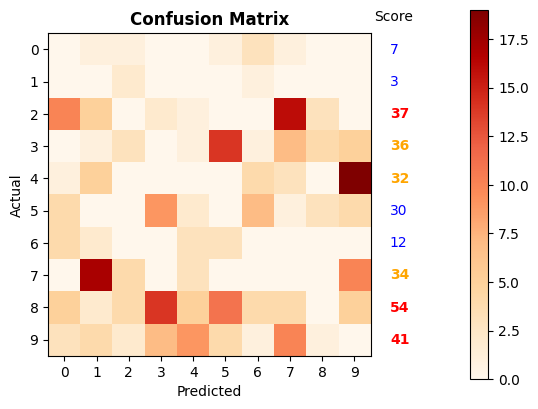

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

knn_en_cm = confusion_matrix(y_test, knn_enhanced_pred, labels=np.arange(10)) 

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(knn_en_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(knn_en_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(knn_en_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    if i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    if i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('knn_enhanced_cm.png');
plt.show()

# KNN-Extended Metrics

In [41]:
knn_extended = joblib.load("knn_clf_extended_colab.pkl")



In [23]:
knn_extended_pred = knn_extended.predict(X_test)

knn_extended_acc = accuracy_score( y_test, knn_extended_pred)

knn_extended_acc


/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.9763

In [24]:
knn_extended_prec = precision_score(y_test,  knn_extended_pred, average='macro')

knn_extended_prec



0.9766352308968693

In [25]:
knn_extended_rec = recall_score(y_test, knn_extended_pred, average='weighted')

knn_extended_rec



0.9763

In [26]:
knn_extended_f1 = f1_score(y_test, knn_extended_pred, average='weighted')

knn_extended_f1

0.9762833512584528

In [27]:
knn_extended.predict(np.reshape(X_test.iloc[127], (1, -1)))

array([5], dtype=uint8)

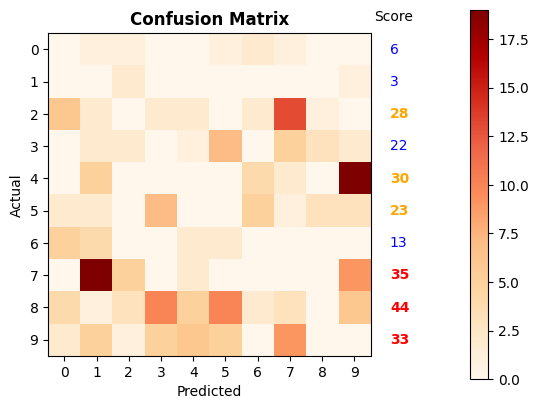

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

knn_ex_cm = confusion_matrix(y_test, knn_extended_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(knn_ex_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(knn_ex_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(knn_ex_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    if i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    if i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('knn_extended_cm.png');
plt.show()

# SGD - OvO Metrics

In [42]:
sgd_ovo_clf = joblib.load("ovo_sgd_clf_colab.pkl")

In [13]:
sgd_ovo_clf_pred = sgd_ovo_clf.predict(X_test)

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneVsOneClassifier was fitted without feature names
  warnings.warn(


In [30]:
sgd_ovo_clf_acc = accuracy_score( y_test, sgd_ovo_clf_pred)

sgd_ovo_clf_acc

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but OneVsOneClassifier was fitted without feature names
  warnings.warn(


0.813

In [31]:
sgd_ovo_clf_prec = precision_score(y_test,  sgd_ovo_clf_pred, average='macro')

sgd_ovo_clf_prec

0.8591031022514455

In [32]:
sgd_ovo_clf_rec = recall_score(y_test, sgd_ovo_clf_pred, average='weighted')

sgd_ovo_clf_rec



0.813

In [33]:
sgd_ovo_clf_f1 = f1_score(y_test, sgd_ovo_clf_pred, average='weighted')

sgd_ovo_clf_f1

0.800547282398953

In [32]:
sgd_ovo_clf.decision_function(X_train_full.iloc[5].values.reshape(1,-1))

array([[ 5.33320621, -0.33333017,  9.33332764,  5.3333212 ,  2.66673051,
         4.33329027,  0.66667335,  2.66670007,  8.33332728,  7.33331577]])

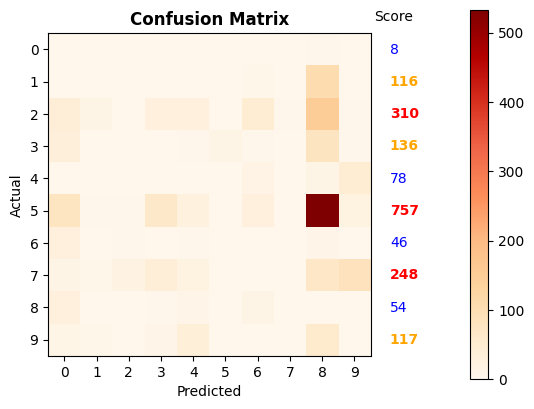

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sgd_ovo_clf_cm = confusion_matrix(y_test, sgd_ovo_clf_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(sgd_ovo_clf_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(sgd_ovo_clf_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(sgd_ovo_clf_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    elif i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    elif i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('sgd_ovo_clf_cm.png');
plt.show()

# SGD - OvR Metrics

In [43]:
sgd_ovr_clf = joblib.load("ovr_sgd_clf_colab.pkl")


In [35]:

sgd_ovr_clf_pred = sgd_ovr_clf.predict(X_test)

sgd_ovr_clf_acc = accuracy_score( y_test, sgd_ovr_clf_pred)

sgd_ovr_clf_acc

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SGDClassifier was fitted without feature nam

0.8253

In [36]:
sgd_ovr_clf_prec = precision_score(y_test,  sgd_ovr_clf_pred, average='macro')

sgd_ovr_clf_prec

0.8492765055766178

In [37]:
sgd_ovr_clf_rec = recall_score(y_test, sgd_ovr_clf_pred, average='weighted')

sgd_ovr_clf_rec

0.8253

In [38]:
sgd_ovr_clf_f1 = f1_score(y_test, sgd_ovr_clf_pred, average='weighted')

sgd_ovr_clf_f1

0.8208239418579742

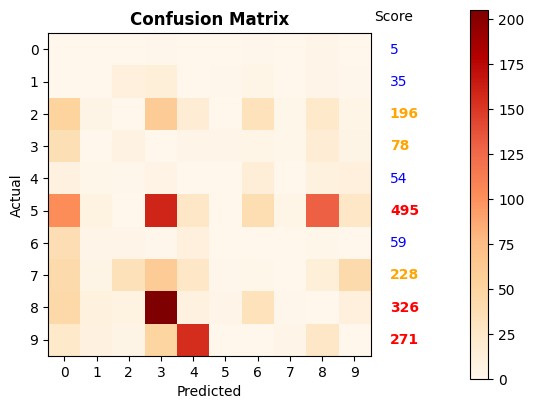

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sgd_ovr_clf_cm = confusion_matrix(y_test, sgd_ovr_clf_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(sgd_ovr_clf_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(sgd_ovr_clf_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(sgd_ovr_clf_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    elif i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    elif i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('sgd_ovr_clf_cm.png');
plt.show()

# RFC - OvO Metrics

In [40]:
from sklearn.multiclass import OneVsOneClassifier

In [44]:
rf_ovo_clf = joblib.load("ovo_rf_clf_colab.pkl")

In [ ]:
rf_ovo_clf_pred = rf_ovo_clf.predict(X_test)

In [46]:
rf_ovo_clf_acc = accuracy_score( y_test, rf_ovo_clf_pred)

rf_ovo_clf_acc

0.9656

In [43]:
isinstance(rf_ovo_clf.estimator, RandomForestClassifier)

True

In [47]:
rf_ovo_clf_prec = precision_score(y_test,  rf_ovo_clf_pred, average='macro')

rf_ovo_clf_prec

0.9654536968771158

In [48]:
rf_ovo_clf_rec = recall_score(y_test, rf_ovo_clf_pred, average='weighted')

rf_ovo_clf_rec

0.9656

In [49]:
rf_ovo_clf_f1 = f1_score(y_test, rf_ovo_clf_pred, average='weighted')

rf_ovo_clf_f1

0.9656443811404773

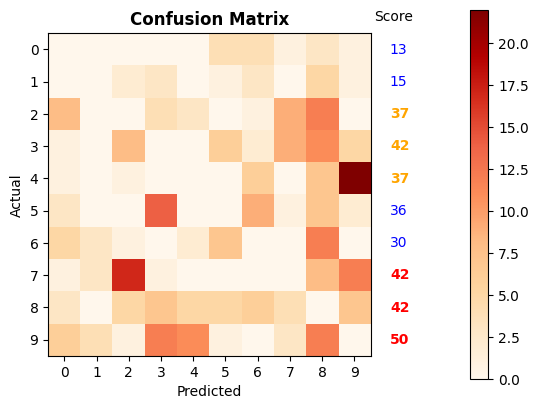

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

rf_ovo_clf_cm = confusion_matrix(y_test, rf_ovo_clf_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(rf_ovo_clf_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(rf_ovo_clf_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(rf_ovo_clf_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    elif i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    elif i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('rf_ovo_clf_cm.png');
plt.show()

/home/test/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


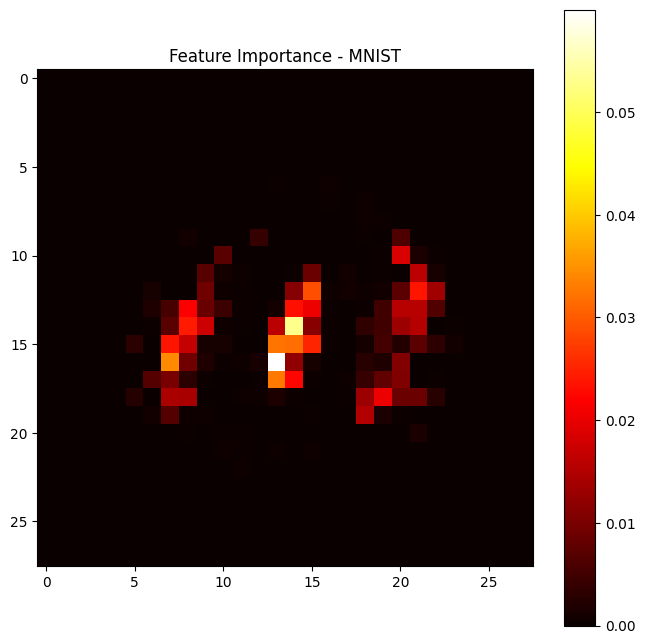

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist['data']
y = mnist['target']

# Train a Random Forest Classifier for each class pair in the OneVsOneClassifier
# Replace `ovr_clf` with your OneVsOneClassifier model
for clf in rf_ovo_clf.estimators_:
    if isinstance(clf, RandomForestClassifier):
        rf_clf = clf
        break

# Calculate the average feature importance across all binary classifiers
importances = np.mean([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)

# Reshape feature importance to match the original image shape
importances = importances.reshape((28, 28))

# Visualize feature importance
plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.title('Feature Importance - MNIST')
plt.colorbar()
plt.show()


# RFC - OvR Metrics

In [45]:
rf_ovr_clf = joblib.load("ovr_rf_clf_colab.pkl")

In [51]:
rf_ovr_clf_pred = rf_ovr_clf.predict(X_test)

rf_ovr_clf_acc = accuracy_score( y_test, rf_ovr_clf_pred)

rf_ovr_clf_acc

0.9665

In [52]:
rf_ovr_clf_prec = precision_score(y_test,  rf_ovr_clf_pred, average='macro')

rf_ovr_clf_prec

0.9664331517825872

In [53]:
rf_ovr_clf_rec = recall_score(y_test, rf_ovr_clf_pred, average='weighted')

rf_ovr_clf_rec

0.9665

In [54]:
rf_ovr_clf_f1 = f1_score(y_test, rf_ovr_clf_pred, average='weighted')

rf_ovr_clf_f1

0.9664931379194104

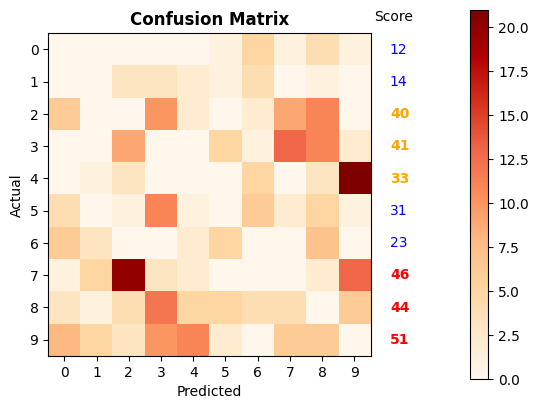

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

rf_ovr_clf_cm = confusion_matrix(y_test, rf_ovr_clf_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(rf_ovr_clf_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(rf_ovr_clf_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(rf_ovr_clf_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    elif i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    elif i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('rf_ovr_clf_cm.png');
plt.show()

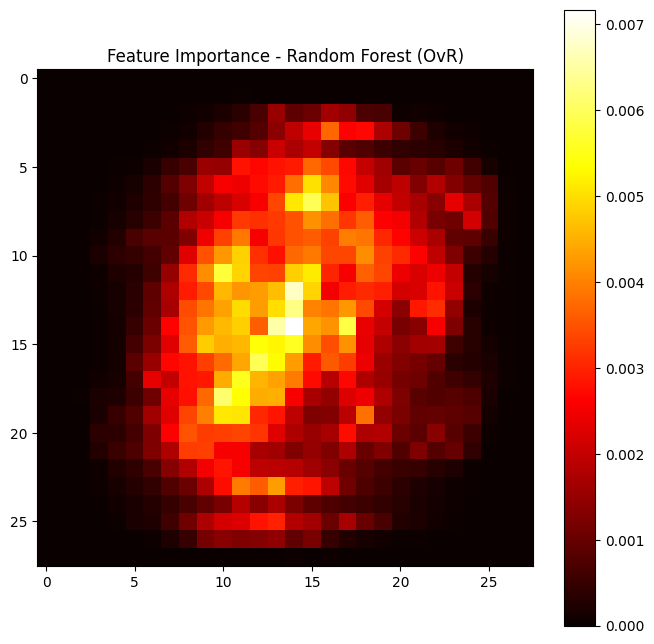

In [13]:
import matplotlib.pyplot as plt

# Calculate the average feature importance across all classes
importances = np.mean([tree.feature_importances_ for tree in rf_ovr_clf.estimators_], axis=0)
importances = importances.reshape((28, 28))

# Visualize the feature importance
plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.title('Feature Importance - Random Forest (OvR)')
plt.colorbar()
plt.show()

# SVC - OvO Metrics

In [46]:
svc_ovo_clf = joblib.load("ovo_svc_clf_colab.pkl")

In [ ]:
svc_ovo_clf_pred = svc_ovo_clf.predict(X_test)

In [56]:
svc_ovo_clf_acc = accuracy_score(y_test, svc_ovo_clf_pred)

svc_ovo_clf_acc

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.1028

In [57]:
svc_ovo_clf_prec = precision_score(y_test, svc_ovo_clf_pred, average='macro')

svc_ovo_clf_prec

/home/test/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.010280000000000001

In [58]:
svc_ovo_clf_rec = recall_score(y_test, svc_ovo_clf_pred, average='weighted')

svc_ovo_clf_rec

0.1028

In [59]:
svc_ovo_clf_f1 = f1_score(y_test, svc_ovo_clf_pred, average='weighted')

svc_ovo_clf_f1

0.019165469713456656

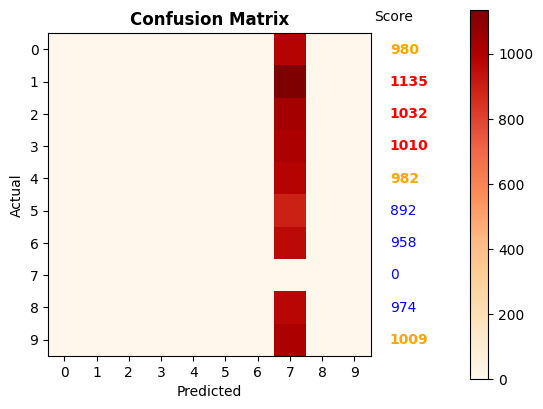

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svc_ovo_clf_cm = confusion_matrix(y_test, svc_ovo_clf_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(svc_ovo_clf_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(svc_ovo_clf_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(svc_ovo_clf_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    elif i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    elif i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
# plt.savefig('svc_ovo_clf_cm.png');
plt.show()

In [24]:
from sklearn.inspection import permutation_importance

# Calculate the average feature importance across all classes
result = permutation_importance(svc_ovo_clf, X_train_full, y_train_full, n_repeats=10, random_state=42)
importances = result.importances_mean.reshape((28, 28))

# Visualize the feature importance
plt.figure(figsize=(8, 8))
plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.title('Feature Importance - SVC (OvO)')
plt.colorbar()
plt.show()

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-pa

KeyboardInterrupt: 

In [21]:
type(svc_ovo_clf)

sklearn.svm._classes.SVC

# SVC - OvR Metrics

In [47]:
svc_ovr_clf = joblib.load("ovr_svc_clf_colab.pkl")

In [61]:

svc_ovr_clf_pred = svc_ovr_clf.predict(X_test)

svc_ovr_clf_acc = accuracy_score(y_test, svc_ovr_clf_pred)

svc_ovr_clf_acc

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-pa

0.1028

In [62]:
svc_ovr_clf_prec = precision_score(y_test,  svc_ovr_clf_pred, average='weighted')

svc_ovr_clf_prec

/home/test/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.01056784

In [63]:
svc_ovr_clf_rec = recall_score(y_test, svc_ovr_clf_pred, average='weighted')

svc_ovr_clf_rec

0.1028

In [64]:
svc_ovr_clf_f1 = f1_score(y_test, svc_ovr_clf_pred, average='weighted')

svc_ovr_clf_f1

0.019165469713456656

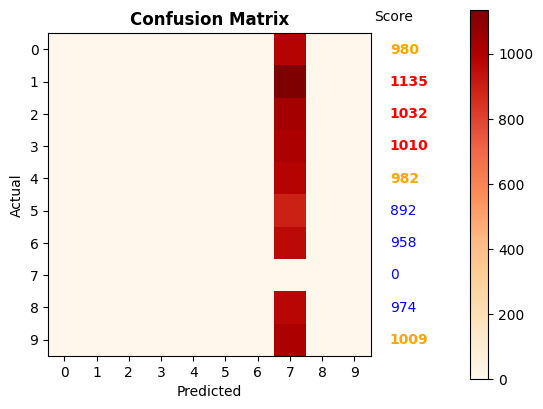

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

svc_ovr_clf_cm = confusion_matrix(y_test, svc_ovr_clf_pred, labels=np.arange(10)) - np.eye(10)

# for i in range(10):
#     knn_en_cm[i][i] =0
# knn_en_cm = knn_en_cm - np.eye(len(knn_en_cm))

np.fill_diagonal(svc_ovr_clf_cm, 0)

fig, ax = plt.subplots()
im = ax.imshow(np.array(svc_ovr_clf_cm), cmap='OrRd') 
ax.figure.colorbar(im, ax=ax, pad=.2)
ax.set_xticks(np.arange(10))
ax.set_yticks(np.arange(10))
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix', fontweight='bold')

# Compute the sum of values for each predicted class
sum_values = np.nansum(svc_ovr_clf_cm, axis=1)

# Get the indices of the top 6 sum values in magnitude
top_indices = np.argsort(sum_values)[-3:]
med_indices = np.argsort(sum_values)[-6:-3]
rest_indices = np.argsort(sum_values)[:-6]

# Display the sum values on the right side

for i, sum_val in enumerate(sum_values):
    if np.isnan(sum_val):
        sum_val = 0
    if i in top_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='red', fontweight='bold')
    elif i in med_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='orange', fontweight='bold')
    elif i in rest_indices:
        ax.text(10.1, i, str(int(sum_val)), va='center', color='blue')

ax.text(10.2, -1, 'Score', va='center', ha='center')
plt.savefig('svc_ovr_clf_cm.png');
plt.show()

# MIsC

In [34]:
test_images = np.load('test_images.npy')

In [35]:
test_labels = np.load('test_labels.npy')

In [36]:
test_labels[0]

7

In [37]:
preprocessed_image = test_images[0].reshape(1, -1)

In [38]:
preprocessed_image.shape

(1, 784)

In [31]:
preprocessed_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [33]:
sgd_ovo_clf_pred = sgd_ovo_clf.predict(preprocessed_image)
svc_ovo_clf_pred = svc_ovo_clf.predict(preprocessed_image)
rf_ovo_clf_pred = rf_ovo_clf.predict(preprocessed_image)

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


In [49]:
sgd_ovo_clf.decision_function(preprocessed_image)

array([[ 5.33327291, -0.33333023,  5.33332395,  7.33332753,  1.66667624,
         3.33332162,  0.66666923,  9.33332624,  7.33332856,  6.33332157]])

In [51]:
svc_ovr_clf.decision_function(preprocessed_image)

array([[-0.96660774, -0.95790454, -0.67976469, -0.80259261, -0.9398127 ,
        -0.8749978 , -0.70103278, -0.58001626, -0.97453162, -0.904486  ]])

In [48]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from itertools import combinations

# Define the class labels for the digits dataset
class_labels = list(range(10))

# Generate all pairwise combinations of the class labels
class_pairs = list(combinations(class_labels, 2))

# Train SVC OvO models and obtain decision scores
svc_ovo_decision_scores = {}

# Iterate over the pairs of classes
for class_pair in class_pairs:
    class1, class2 = class_pair

    # Filter the dataset for the current class pair
    X_filtered = X_train_full[(y_train_full == class1) | (y_train_full == class2)]
    y_filtered = y_train_full[(y_train_full == class1) | (y_train_full == class2)]

    # Obtain the decision scores for the current class pair
    decision_scores = svc_ovo_clf.decision_function(X_filtered)
    svc_ovo_decision_scores[class_pair] = decision_scores

# Access the decision scores for a specific class pair
class_pair = (0, 1)
decision_scores = svc_ovo_decision_scores[class_pair]
print(f"Decision scores for classes {class_pair}:")
print(decision_scores)


ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 1 is required by OneVsOneClassifier.

In [ ]:
rf_ovr_clf = joblib.load("ovr_rf_clf_colab.pkl")

In [ ]:
predicted_probabilities = rf_ovr_clf .predict_proba(preprocessed_image)[0]

In [ ]:
predicted_probabilities

In [ ]:
confidence_scores = predicted_probabilities.max(axis=0)

In [ ]:
confidence_scores

In [ ]:
svc_ovo_clf = joblib.load("ovo_svc_clf_colab.pkl")

In [ ]:
type(svc_ovo_clf)

In [ ]:
from sklearn.svm import SVC

In [ ]:
isinstance(svc_ovo_clf, SVC)

In [ ]:
isinstance(svc_ovo_clf, OneVsOneClassifier)

In [ ]:
confidence_scores =svc_ovo_clf.decision_function(preprocessed_image)

In [ ]:
confidence_scores)

In [ ]:
svc_ovr_clf = joblib.load("ovr_svc_clf_colab.pkl")

In [ ]:
isinstance(svc_ovr_clf, SVC)

In [ ]:
type(svc_ovr_clf)

In [ ]:
svc_ovo_

In [52]:
from matplotlib.backends.backend_agg import FigureCanvasAgg 
import io, base64
def predict_image(preprocessed_image):
    # Perform prediction using a machine learning model
    predictions = make_predictions(preprocessed_image)

    return predictions


def calculate_confidence_score(model, preprocessed_image):
    confidence_score = 0
    if isinstance(model, (OneVsOneClassifier, OneVsRestClassifier)):
        base_estimator = model.estimator  # type: ignore
        if isinstance(base_estimator, (SGDClassifier, RandomForestClassifier)):
        # For SGD, SVC, and RandomForestClassifier models, use decision_function to get the confidence scores
            if hasattr(model, 'decision_function'):
                
                decision_values = svc_ovo_clf.decision_function(preprocessed_image)
                confidence_scores = (decision_values - decision_values.min()) / (decision_values.max() - decision_values.min()) * 100
                confidence_score = max(max(confidence_scores)) #type: ignore
            elif hasattr(model, 'predict_proba'):
                # For RandomForestClassifier, use predict_proba to get the predicted probabilities
                predicted_probabilities = model.predict_proba(preprocessed_image)[0]  #type: ignore
                confidence_score = predicted_probabilities.max(axis=0)* 100
            else:
                raise ValueError("Unsupported model type")
    elif isinstance(model, SVC):
        # For SVC model, use decision_function to get the confidence scores
        confidence_score = max(max(model.decision_function(preprocessed_image)))  # type: ignore
        
    elif isinstance(model, KNeighborsClassifier):
        # For KNeighborsClassifier model, use predict_proba to get the predicted probabilities
        predicted_probabilities = model.predict_proba(preprocessed_image)[0] #type: ignore
        confidence_score = max(predicted_probabilities) * 100
    else:
        raise ValueError("Unsupported model type")

    return confidence_score

import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(image, cmap=mpl.cm.binary, interpolation="nearest") #type: ignore
    ax.axis("off")

    # Render the figure on the canvas
    canvas = FigureCanvasAgg(fig)
    canvas.draw()

    # Save the rendered figure to a buffer
    buffer = io.BytesIO()
    canvas.print_png(buffer)

    # Encode the image buffer to base64
    image_base64 = base64.b64encode(buffer.getvalue()).decode("utf-8")

    plt.close(fig)  # Close the figure

    return image_base64




def make_predictions(preprocessed_image):

    # Assuming your 1D array is named 'input_array'
    preprocessed_image = preprocessed_image.reshape(1, -1)
    # preprocessed_image_index = np.where(np.all(test_images == preprocessed_image, axis=1))[0][0] #type: ignore
    
    # Use the preprocessed image and loaded models to make predictions
    knn_enhance_pred = knn_enhanced.predict(preprocessed_image)[0]
    knn_extended_pred = knn_extended.predict(preprocessed_image)[0]

    rf_ovo_clf_pred = rf_ovo_clf.predict(preprocessed_image)[0]
    rf_ovr_clf_pred = rf_ovr_clf.predict(preprocessed_image)[0]

    sgd_ovo_clf_pred = sgd_ovo_clf.predict(preprocessed_image)[0]
    sgd_ovr_clf_pred = sgd_ovr_clf.predict(preprocessed_image)[0]

    svc_ovo_clf_pred = svc_ovo_clf.predict(preprocessed_image)[0]
    svc_ovr_clf_pred = svc_ovr_clf.predict(preprocessed_image)[0]

    # Generate base64-encoded image data


    # Create a dictionary to store the model predictions and confidence scores
    predictions = {
        'image': plot_digit(preprocessed_image),
        'knn_enhanced': {
            'prediction':knn_enhance_pred,
            'confidence': calculate_confidence_score(knn_enhanced, preprocessed_image),
            'accuracy': 0.9714, 
            'precision': 0.9715597201945959, 
            'recall': 0.9714,
            'f1_score':0.9713597782738583,
        },
        'knn_extended': {
            'prediction': knn_extended_pred,
            'confidence': calculate_confidence_score(knn_extended, preprocessed_image),
            'accuracy': 0.9763, 
            'precision': 0.9766352308968693, 
            'recall': 0.9763,
            'f1_score':0.9762833512584528,
        },
        'rf_ovo_clf': {
            'prediction': rf_ovo_clf_pred,
            'confidence': calculate_confidence_score(rf_ovo_clf, preprocessed_image),
            'accuracy': 0.9656, 
            'precision': 0.9654536968771158, 
            'recall': 0.9656,
            'f1_score':0.9656443811404773,
        },
        'rf_ovr_clf': {
            'prediction': rf_ovr_clf_pred,
            'confidence': calculate_confidence_score(rf_ovr_clf, preprocessed_image),
            'accuracy': 0.9665, 
            'precision': 0.9664331517825872, 
            'recall': 0.9665,
            'f1_score':0.9664931379194104,
        },
        'sgd_ovo_clf': {
            'prediction': sgd_ovo_clf_pred,
            'confidence': calculate_confidence_score(sgd_ovo_clf, preprocessed_image),
            'accuracy': 0.813, 
            'precision': 0.8591031022514455, 
            'recall': 0.813,
            'f1_score':0.800547282398953,
        },
        'sgd_ovr_clf': {
            'prediction': sgd_ovr_clf_pred,
            'confidence': calculate_confidence_score(sgd_ovr_clf, preprocessed_image),
            'accuracy': 0.8253, 
            'precision': 0.8492765055766178, 
            'recall': 0.8253,
            'f1_score':0.8208239418579742,
        },
        'svc_ovo_clf': {
            'prediction': svc_ovo_clf_pred,
            'confidence': calculate_confidence_score(svc_ovo_clf, preprocessed_image),
            'accuracy': 0.1028, 
            'precision': 0.010280000000000001, 
            'recall': 0.1028,
            'f1_score': 0.019165469713456656,
        },
        'svc_ovr_clf': {
            'prediction': svc_ovr_clf_pred,
            'confidence': calculate_confidence_score(svc_ovr_clf, preprocessed_image),
            'accuracy': 0.1028, 
            'precision': 0.01056784, 
            'recall': 0.1028,
            'f1_score': 0.019165469713456656,
        }
    }

    # Perform any post-processing on the predictions

    return predictions

predictions = make_predictions(preprocessed_image)
print("Done")

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages

NameError: name 'OneVsOneClassifier' is not defined

In [224]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    normalized_data = (data - data.min()) / (data.max() - data.min())

    plt.imshow(normalized_data, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show();

In [27]:
predictions

{'image': 'iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAYAAACtWK6eAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAFlElEQVR4nO3dz4tNfxzH8TuymxQLCcVCNiIr1pQF5feKmiyklIVkIYaslIUfJRFpWFtYKAsWimxkMSt2hISyQDZIzf3+AZ/PeXXme+81Zu7jsXz3mXNP8pxP53Tm3JFut9vtAFXzZvoE4F8mEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCASC+TN9AjT7/PlzMZuYmKiuffv2bTG7c+dO6886ffp0dX7y5MliNjo62vq4s50dBAKBQCAQCAQCwUi32+3O9EkMu4sXL1bnV65cKWafPn0ayDk0/Tc4duxYMbt8+fJAzuFfZAeBQCAQCAQCgUAgEAg8ajIgU1NT1fmFCxeK2dmzZ6tr//z5U8wWLVpUXXvgwIFi9u3bt+rahw8fFrMvX75U1w7qrtlsYQeBQCAQCAQCgUDgIn1AahfjnU6nMz4+3voYe/bsKWY3btyorl28eHHr465bt66YNV2kL1u2rPVx5yI7CAQCgUAgEAgEAoFA4C7WNHz9+rU6P3fuXDG7du1a6+Pev3+/Ot++fXvrY9S8ePGiOn/9+nXrY+zataunc5jt7CAQCAQCgUAgEAhcpDeoXZBv2rSpuvbly5fFbMGCBdW1k5OTxWzVqlXTO7mK9+/fF7OxsbHq2t+/fxezhQsXVtd61ARoJBAIBAKBQ

In [28]:
print(predictions['image'])

iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAYAAACtWK6eAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAFlElEQVR4nO3dz4tNfxzH8TuymxQLCcVCNiIr1pQF5feKmiyklIVkIYaslIUfJRFpWFtYKAsWimxkMSt2hISyQDZIzf3+AZ/PeXXme+81Zu7jsXz3mXNP8pxP53Tm3JFut9vtAFXzZvoE4F8mEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCAQCgUAgEAgEAoFAIBAIBAKBQCAQCASC+TN9AjT7/PlzMZuYmKiuffv2bTG7c+dO6886ffp0dX7y5MliNjo62vq4s50dBAKBQCAQCAQCwUi32+3O9EkMu4sXL1bnV65cKWafPn0ayDk0/Tc4duxYMbt8+fJAzuFfZAeBQCAQCAQCgUAgEAg8ajIgU1NT1fmFCxeK2dmzZ6tr//z5U8wWLVpUXXvgwIFi9u3bt+rahw8fFrMvX75U1w7qrtlsYQeBQCAQCAQCgUDgIn1AahfjnU6nMz4+3voYe/bsKWY3btyorl28eHHr465bt66YNV2kL1u2rPVx5yI7CAQCgUAgEAgEAoFA4C7WNHz9+rU6P3fuXDG7du1a6+Pev3+/Ot++fXvrY9S8ePGiOn/9+nXrY+zataunc5jt7CAQCAQCgUAgEAhcpDeoXZBv2rSpuvbly5fFbMGCBdW1k5OTxWzVqlXTO7mK9+/fF7OxsbHq2t+/fxezhQsXVtd61ARoJBAIBAKBQCAQCATuYjXY

In [30]:
from PIL import Image

# Assuming `image_base64` contains the base64-encoded image data
image_data = base64.b64decode(predictions['image'])

# Create an in-memory stream to hold the image data
image_stream = io.BytesIO(image_data)

# Open the image stream as a PIL Image object
image = Image.open(image_stream)

# Save the image to a file
image.save('decoded_image.png')

In [215]:
predictions

{'idx': 9423,
 'knn_enhanced': {'name': 'ave    ',
  'prediction': 9,
  'confidence': 100.0,
  'accuracy': 0.9714,
  'precision': 0.9715597201945959,
  'recall': 0.9714,
  'f1_score': 0.9713597782738583},
 'knn_extended': {'name': 9,
  'confidence': 100.0,
  'accuracy': 0.9763,
  'precision': 0.9766352308968693,
  'recall': 0.9763,
  'f1_score': 0.9762833512584528},
 'rf_ovo_clf': {'name': 9,
  'confidence': 100.0,
  'accuracy': 0.9656,
  'precision': 0.9654536968771158,
  'recall': 0.9656,
  'f1_score': 0.9656443811404773},
 'rf_ovr_clf': {'name': 9,
  'confidence': 94.18604651162791,
  'accuracy': 0.9665,
  'precision': 0.9664331517825872,
  'recall': 0.9665,
  'f1_score': 0.9664931379194104},
 'sgd_ovo_clf': {'name': 9,
  'confidence': 100.0,
  'accuracy': 0.813,
  'precision': 0.8591031022514455,
  'recall': 0.813,
  'f1_score': 0.800547282398953},
 'sgd_ovr_clf': {'name': 9,
  'confidence': 100.0,
  'accuracy': 0.8253,
  'precision': 0.8492765055766178,
  'recall': 0.8253,
  'f1_s

In [159]:
def process_selected_image(selected_image):

    # Load the cached dataset
    scaled_test_images = np.load('scaled_test_images.npy')
    test_labels = np.load('test_labels.npy')

    # Filter images with the selected label
    images_with_label = [image for image, image_label in zip(scaled_test_images, test_labels) if image_label == selected_image]
        
    # Select a random image with the selected label
    random_image = random.choice(images_with_label)
    random_image_index = np.where(np.all(scaled_test_images == random_image, axis=1))[0][0]


    # Perform image preprocessing and prediction on the selected image
    predictions = predict_image(random_image)

    # Pass the predictions, predicted label, confusion matrix, and model metrics to the template
    return random_image_index #type: ignore


process_selected_image(5)

/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/test/.local/lib/python3.10/site-packages

6638

In [192]:
test_labels[8662]

4

In [185]:
y_test.iloc[3619]

5

In [216]:
predictions.items()

dict_items([('idx', 9423), ('knn_enhanced', {'name': 'ave    ', 'prediction': 9, 'confidence': 100.0, 'accuracy': 0.9714, 'precision': 0.9715597201945959, 'recall': 0.9714, 'f1_score': 0.9713597782738583}), ('knn_extended', {'name': 9, 'confidence': 100.0, 'accuracy': 0.9763, 'precision': 0.9766352308968693, 'recall': 0.9763, 'f1_score': 0.9762833512584528}), ('rf_ovo_clf', {'name': 9, 'confidence': 100.0, 'accuracy': 0.9656, 'precision': 0.9654536968771158, 'recall': 0.9656, 'f1_score': 0.9656443811404773}), ('rf_ovr_clf', {'name': 9, 'confidence': 94.18604651162791, 'accuracy': 0.9665, 'precision': 0.9664331517825872, 'recall': 0.9665, 'f1_score': 0.9664931379194104}), ('sgd_ovo_clf', {'name': 9, 'confidence': 100.0, 'accuracy': 0.813, 'precision': 0.8591031022514455, 'recall': 0.813, 'f1_score': 0.800547282398953}), ('sgd_ovr_clf', {'name': 9, 'confidence': 100.0, 'accuracy': 0.8253, 'precision': 0.8492765055766178, 'recall': 0.8253, 'f1_score': 0.8208239418579742}), ('svc_ovo_clf',

In [236]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show();

In [ ]:
plot_digit(test_images[0])

# Misc

In [22]:
input1 = X_train_full[5].values.reshape(-1, 1)


KeyError: 5

In [53]:
type(svc_ovr_clf)

sklearn.multiclass.OneVsRestClassifier